In [1]:
import limpieza_datos

In [2]:
from limpieza_datos import limpiar_importe
print(limpiar_importe('1.234,56 €'))  # debería devolver 1234.56

1234.56


In [3]:
# limpieza_datos.py

def limpiar_importe(valor):
    """
    Convierte importes tipo '1.234,56 €' en float 1234.56
    """
    try:
        limpio = (
            str(valor)
            .strip()
            .replace('€', '')
            .replace('.', '')
            .replace(',', '.')
        )
        return float(limpio)
    except:
        return None

def limpiar_columna_importes(df, columna):
    """
    Aplica limpieza a una columna de importes en un DataFrame.
    """
    df[columna] = df[columna].apply(limpiar_importe)
    return df

def estandarizar_columnas(df):
    """
    Elimina espacios y estandariza nombres de columnas.
    """
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

In [4]:
from limpieza_datos import limpiar_columna_importes, estandarizar_columnas

df = estandarizar_columnas(df)
df = limpiar_columna_importes(df, 'importe_venta_total')

NameError: name 'df' is not defined

In [5]:
df = pd.read_csv('../data/ventas.csv')  # ejemplo si está en una carpeta superior

NameError: name 'pd' is not defined

In [6]:
import pandas as pd

df = pd.read_csv('ventas.csv', encoding='utf-8')  # ajusta el nombre si es diferente

FileNotFoundError: [Errno 2] No such file or directory: 'ventas.csv'

In [7]:
import os
print(os.getcwd())

C:\Users\jubio\jubior777-portafolio\ventas-python-analisis\src


In [8]:
df = pd.read_csv('C:/Users/jubio/jubior777-portafolio/ventas-python-analisis/src/ventas.csv', encoding='utf-8')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/jubio/jubior777-portafolio/ventas-python-analisis/src/ventas.csv'

In [9]:
import pandas as pd
df = pd.read_csv('ventas.csv', encoding='utf-8')

FileNotFoundError: [Errno 2] No such file or directory: 'ventas.csv'

In [10]:
import pandas as pd

df = pd.read_csv('C:/Users/jubio/jubior777-portafolio/ventas-python-analisis/src/ventas.csv', encoding='utf-8')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/jubio/jubior777-portafolio/ventas-python-analisis/src/ventas.csv'

In [11]:
import pandas as pd

df = pd.read_csv('../data/ventas.csv', encoding='utf-8')

In [12]:
print(df.head())
print(df.columns)

  ID Cliente                    Zona              País   Tipo de producto  \
0      C2421                  europa    United Kingdom             Snacks   
1      C1908                  europa             Malta           Cárnicos   
2      C7652     Australia y Oceanía  Marshall Islands           Cereales   
3      C2326                  Africa              Iran             Frutas   
4      C5305  Centroamérica y Caribe         Guatemala  Alimento infantil   

  Canal de venta Prioridad Fecha pedido  Unidades Precio Unitario  \
0        Offline   Crítica   10/12/2020      5530       152.58 €    
1         Online      Alta    1/26/2020       994       421.89 €    
2         Online   Crítica    11/9/2020      6845       205.70 €    
3        Offline      Baja    8/21/2021      9806         9.33 €    
4        Offline     Media    9/30/2022      3633       255.28 €    

  Coste unitario Importe venta total Importe Coste total   Año  Mes  
0       97.44 €        843,767.40 €        538,843.2

In [13]:
from limpieza_datos import limpiar_columna_importes, estandarizar_columnas

df = estandarizar_columnas(df)
df = limpiar_columna_importes(df, 'importe_venta_total')  # ajusta el nombre si es diferente

In [14]:
from limpieza_datos import limpiar_columna_importes

df = limpiar_columna_importes(df, 'precio_unitario')
df = limpiar_columna_importes(df, 'coste_unitario')
df = limpiar_columna_importes(df, 'importe_venta_total')
df = limpiar_columna_importes(df, 'importe_coste_total')

In [15]:
print(df.dtypes)

id_cliente              object
zona                    object
país                    object
tipo_de_producto        object
canal_de_venta          object
prioridad               object
fecha_pedido            object
unidades                 int64
precio_unitario        float64
coste_unitario         float64
importe_venta_total    float64
importe_coste_total    float64
año                      int64
mes                      int64
dtype: object


NameError: name 'plt' is not defined

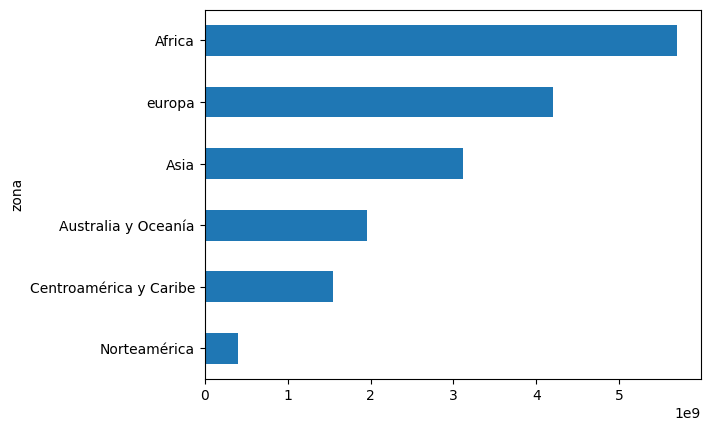

In [16]:
df.groupby('zona')['importe_venta_total'].sum().sort_values().plot(kind='barh')
plt.title('Ventas por zona')
plt.xlabel('Importe total')
plt.show()

In [17]:
import matplotlib.pyplot as plt

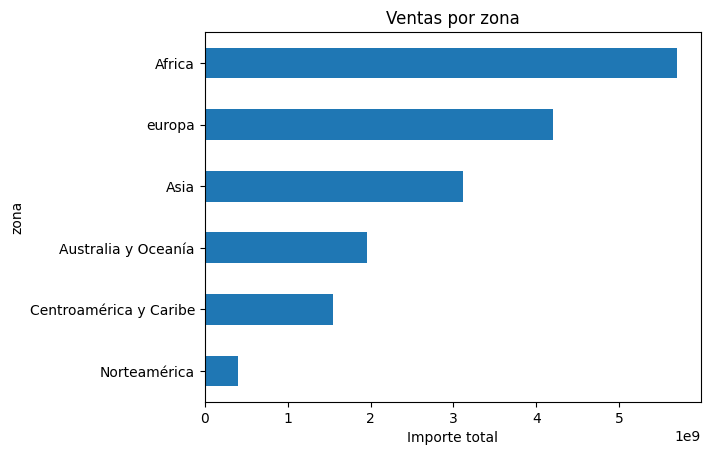

In [18]:
df.groupby('zona')['importe_venta_total'].sum().sort_values().plot(kind='barh')
plt.title('Ventas por zona')
plt.xlabel('Importe total')
plt.show()

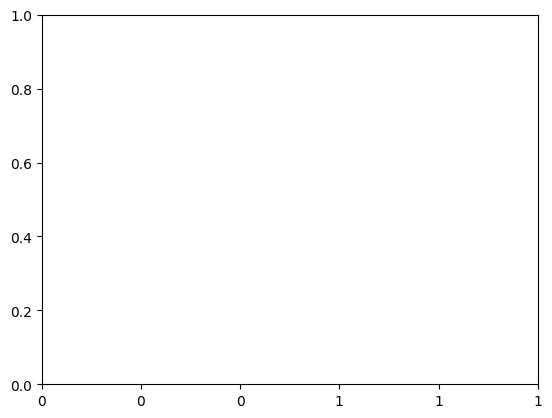

In [19]:
import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

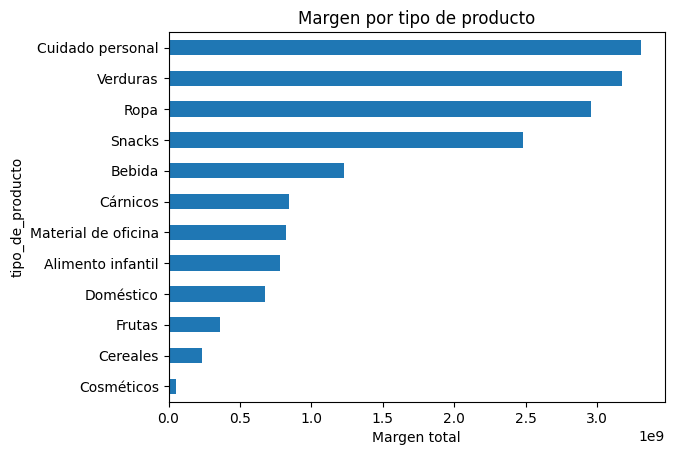

In [20]:
df['margen'] = df['importe_venta_total'] - df['importe_coste_total']
df.groupby('tipo_de_producto')['margen'].sum().sort_values().plot(kind='barh')
plt.title('Margen por tipo de producto')
plt.xlabel('Margen total')
plt.show()

<Axes: title={'center': 'Ventas mensuales'}, xlabel='fecha_pedido'>

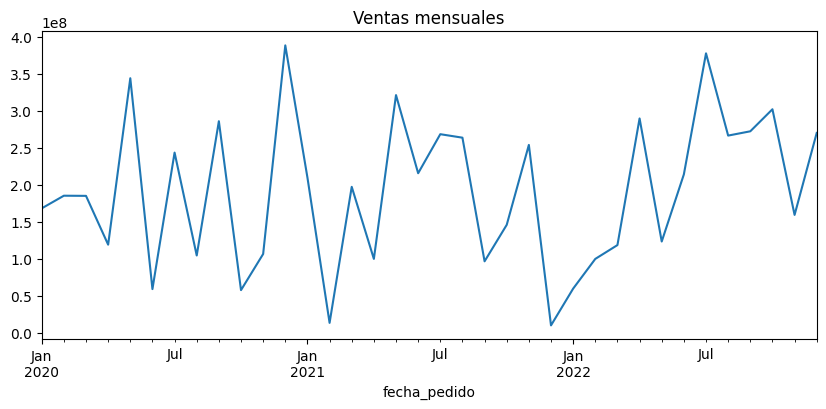

In [21]:
df['fecha_pedido'] = pd.to_datetime(df['fecha_pedido'], dayfirst=True, errors='coerce')
ventas_mensuales = df.groupby(df['fecha_pedido'].dt.to_period('M'))['importe_venta_total'].sum()
ventas_mensuales.plot(figsize=(10,4), title='Ventas mensuales')